In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
corolla = pd.read_csv("data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d,' % nCar, 'nVar: %d' % nVar )

nCar: 1436, nVar: 37


## 범주형 변수를 이진형 변수로 변환

In [4]:
# Fuel_Type 기준으로 dummy variables 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
# 연료타입에 대한 위치 인덱스를 저장  
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [6]:
# dict to dataframe
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla, Fuel), 1)

In [7]:
Fuel.head()

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [8]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [9]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [10]:
feature_columns = list(mlr_data.columns.difference(['Price']))  # Y = Price
print(feature_columns)

X = mlr_data[feature_columns]
y = mlr_data.Price

['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']


In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [12]:
# fitting
full_model = sm.OLS(train_y, train_x).fit()
full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     304.9
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:27:01   Log-Likelihood:                -8427.9
No. Observations:                1005   AIC:                         1.692e+04
Df Residuals:                     971   BIC:                         1.709e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -205.5905    129.423     -1.589      0.112    -459.571      48.390
Age_08_04         -120.3253      4.116    -29.233      0.000    -128.403    -112.248
Airbag_1           301.8035    271.519      1.112      0.267    -231.029     834.635
Airbag_2          -124.6631    131.788     -0.946      0.344    -383.286     133.960
Airco              240.0288     90.778      2.644      0.008      61.884     418.173
Automatic          486.4980    160.285      3.035      0.002     171.952     801.044
Automatic_airco   2546.3674    194.871     13.067      0.000    2163.950    2928.785
BOVAG_Guarantee    456.9423    133.738      3.417      0.001     194.494     719.390
Backseat_Divider  -240.6334    133.630     -1.801      0.072    -502.871      21.604
Boardcomputer     -240.5781    124.071     -1.939      0.053    -484.056       2.900
CD_Player          202.7765    106.502      1.904      0.057      -6.224     411.777
CNG               -857.8155    221.844     -3.867      0.000   -1293.165    -422.467
Central_Lock      -106.8948    150.267     -0.711      0.477    -401.781     187.992
Cylinders           -0.0312      0.002    -13.448      0.000      -0.036      -0.027
Diesel             288.1940    189.458      1.521      0.129     -83.601     659.989
Doors               68.8453     41.591      1.655      0.098     -12.773     150.463
Gears              327.4066    212.000      1.544      0.123     -88.625     743.438
Guarantee_Period    57.0864     13.282      4.298      0.000      31.022      83.151
HP                  19.9945      3.682      5.430      0.000      12.768      27.221
KM                  -0.0169      0.001    -12.789      0.000      -0.019      -0.014
Met_Color           39.9649     77.437      0.516      0.606    -111.999     191.929
Metallic_Rim       279.6572     98.508      2.839      0.005      86.345     472.970
Mfg_Month          -90.2068     10.868     -8.300      0.000    -111.535     -68.879
Mfg_Year             1.9307      0.853      2.264      0.024       0.257       3.604
Mfr_Guarantee      263.4563     76.200      3.457      0.001     113.920     412.992
Mistlamps         -139.3079    113.581     -1.227      0.220    -362.200      83.585
Petrol             569.6138    193.802      2.939      0.003     189.294     949.934
Power_Steering    -323.7140    304.142     -1.064      0.287    -920.565     273.137
Powered_Windows    448.4336    151.629      2.957      0.003     150.875     745.992
Quarterly_Tax        9.5201      1.968      4.837      0.000       5.658      13.382
Radio              138.5277   1098.480      0.126      0.900   -2017.141    2294.197
Radio_cassette    -216.3760   1097.392     -0.197      0.844   -2369.910    1937.158
Sport_Model        333.1902     89.667      3.716      0.000     157.227     509.154
Tow_Bar           -189.

## VIF를 통한 다중공선성 확인 

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

# Age_08_04 : p-value는 매우 유의하지만 VIF 값은 무한대. 이런 경우 일반적으로 제거하지 않음.

C:\Anaconda3\envs\py37_env\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Anaconda3\envs\py37_env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


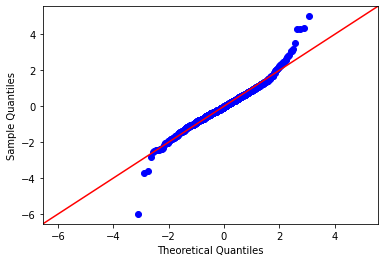

In [14]:
# 학습데이터의 잔차 확인
res = full_model.resid  # residual
pred_y = full_model.predict(train_x)

# Q-Q plot : 잔차의 정규성
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

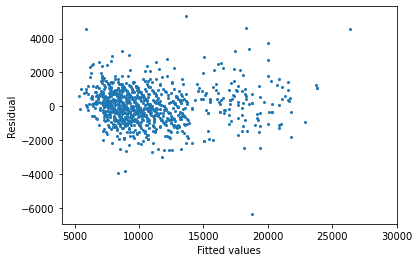

In [15]:
# residual pattern 확인 - 어느 정도 잔차가 균등하게 분포함.
import matplotlib.pyplot as plt

fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [16]:
pred_y = full_model.predict(test_x) ## 검증 데이터에 대한 예측 

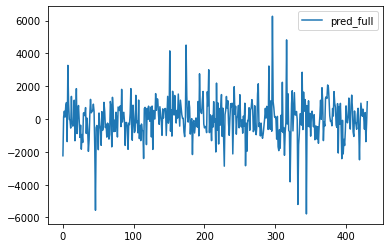

In [17]:
plt.plot(np.array(test_y - pred_y), label="pred_full")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true = test_y, y_pred = pred_y)

1454218.0726091906

## 변수선택법

In [19]:
def processSubset(X, y, feature_set):
            model = sm.OLS(y, X[list(feature_set)]) # Modeling
            regr = model.fit()   # 모델 학습
            AIC = regr.aic       # 모델의 AIC
            return {"model":regr, "AIC":AIC}

In [20]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2282b1af808>,
 'AIC': 16923.89688340386}

In [21]:
import time
import itertools

# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장

def getBest(X, y, k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.8429038524627686 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                  17430
Name: 211, dtype: object


In [22]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [23]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.09574413299560547 seconds.
Processed  630 models on 2 predictors in 0.8696870803833008 seconds.
Processed  7140 models on 3 predictors in 10.58463454246521 seconds.
Total elapsed time: 11.740076780319214 seconds.


In [24]:
models

,AIC,model
1,17695.617055,<statsmodels.regression.linear_model.Regressio...
2,17429.988843,<statsmodels.regression.linear_model.Regressio...
3,17301.798627,<statsmodels.regression.linear_model.Regressio...


In [25]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2118.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:27:14   Log-Likelihood:                -8646.9
No. Observations:                1005   AIC:                         1.730e+04
Df Residuals:                    1001   BIC:                         1.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0224      0.001    -16.741      0.000      -0.025      -0.020
Mfg_Year    1528.5385     36.717     41.630      0.000    1456.487    1600.590
Weight        17.3010      0.928     18.635      0.000      15.479      19.123
const      -3.063e+06   7.29e+04    -41.987      0.000   -3.21e+06   -2.92e+06
==============================================================================
Omnibus:                      150.718   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1529.494
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       9.012   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(full_model.rsquared))
print("full model AIC: ","{:.5f}".format(full_model.aic))
print("full model MSE: ","{:.5f}".format(full_model.mse_total))

print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91199
full model AIC:  16923.89688
full model MSE:  12806380.90937
selected model Rsquared:  0.86393
selected model AIC:  17301.79863
selected model MSE:  12806380.90937


Text(0, 0.5, 'BIC')

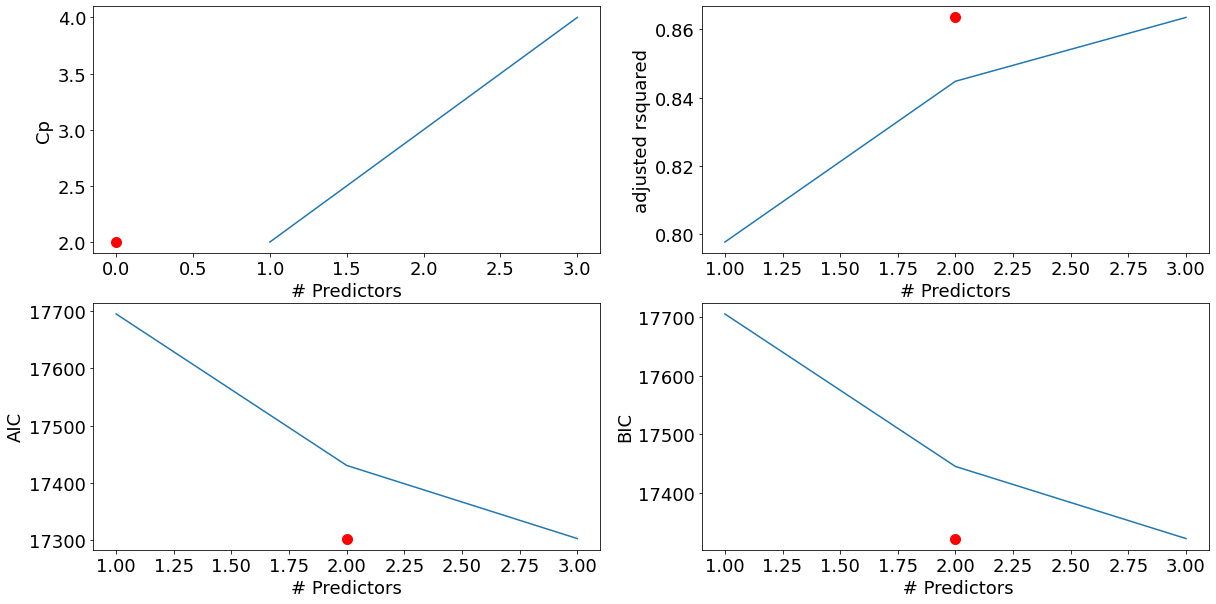

In [27]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0] + (row[1].mse_total-full_model.mse_total)
                              *(train_x.shape[0]-row[1].params.shape[0])/full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [28]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [29]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [30]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.05784320831298828
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022849AAA9C8>
Processed  35 models on 2 predictors in 0.052860260009765625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022849AB45C8>
Processed  34 models on 3 predictors in 0.05088496208190918
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022849ADF188>
Processed  33 models on 4 predictors in 0.05088615417480469
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A838C8>
Processed  32 models on 5 predictors in 0.049866437911987305
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'K

In [31]:
Forward_best_model.aic

16911.315313944564

In [32]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     457.8
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:27:16   Log-Likelihood:                -8432.7
No. Observations:                1005   AIC:                         1.691e+04
Df Residuals:                     982   BIC:                         1.702e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year             3.1796      0.594      5.354      0.000       2.014       4.345
Automatic_airco   2459.2487    183.477     13.404      0.000    2099.197    2819.301
KM                  -0.0172      0.001    -13.686      0.000      -0.020      -0.015
Weight               8.1713      1.145      7.139      0.000       5.925      10.418
Powered_Windows    348.4521     84.555      4.121      0.000     182.524     514.380
HP                  22.1646      2.968      7.468      0.000      16.340      27.989
Mfr_Guarantee      272.3372     75.227      3.620      0.000     124.712     419.962
Guarantee_Period    56.9826     13.115      4.345      0.000      31.246      82.719
BOVAG_Guarantee    459.2757    130.198      3.528      0.000     203.778     714.774
Sport_Model        382.2524     85.101      4.492      0.000     215.252     549.252
Quarterly_Tax        8.1212      1.409      5.764      0.000       5.356      10.886
CNG              -1353.1433    325.931     -4.152      0.000   -1992.745    -713.542
Metallic_Rim       277.7679     91.935      3.021      0.003      97.357     458.179
Mfg_Month          -90.6468     10.703     -8.469      0.000    -111.650     -69.644
ABS               -307.3709    101.017     -3.043      0.002    -505.604    -109.137
Automatic          453.5043    156.229      2.903      0.004     146.923     760.085
Backseat_Divider  -270.2893    116.719     -2.316      0.021    -499.337     -41.242
Airco              209.2592     87.169      2.401      0.017      38.200     380.318
Tow_Bar           -178.3797     79.850     -2.234      0.026    -335.076     -21.683
Boardcomputer     -250.1671    121.487     -2.059      0.040    -488.570     -11.764
CD_Player          203.5729    102.666      1.983      0.048       2.104     405.042
Doors               65.0244     39.645      1.640      0.101     -12.774     142.823
Age_08_04         -120.7410      3.977    -30.361      0.000    -128.545    -112.937
Cylinders           -0.0288      0.002    -14.175      0.000      -0.033      -0.025
const               -0.0072      0.001    -14.175      0.000      -0.008      -0.006
==============================================================================
Omnibus:                       72.572   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.729
Skew:                           0.207   Prob(JB):                     9.01e-63
Kurtosis:                       5.579   Cond. No.                     1.11e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.05e-30. This might indicate that there are
strong multicollinearity problems or that the desi

# 후진소거법

In [33]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [34]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [35]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.12516140937805176
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848AAFC08>
Processed  35 models on 34 predictors in 0.11542987823486328
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mf

In [36]:
Backward_best_model.aic

16911.99164546636

# 단계적 선택법

In [37]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [38]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.05485224723815918
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022849A889C8>
forward
Processed  1 models on 0 predictors in 0.0029935836791992188
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A45B88>
Processed  35 models on 2 predictors in 0.05385541915893555
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A7F2C8>
forward
Processed  2 models on 1 predictors in 0.005984306335449219
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A6CDC8>
Processed  34 models on 3 predictors in 0.050863027572631836
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.

Processed  15 models on 14 predictors in 0.02942657470703125
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Quarterly_Tax', 'CNG', 'Metallic_Rim', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A5D348>
Processed  21 models on 16 predictors in 0.05372476577758789
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Quarterly_Tax', 'CNG', 'Metallic_Rim', 'Mfg_Month', 'ABS', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A49688>
forward
Processed  16 models on 15 predictors in 0.0359044075012207
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'BOVAG_Gu

Processed  25 models on 24 predictors in 0.07081055641174316
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Quarterly_Tax', 'CNG', 'Metallic_Rim', 'Mfg_Month', 'ABS', 'Automatic', 'Backseat_Divider', 'Airco', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Doors', 'Age_08_04', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A32A08>
backward
Processed  12 models on 25 predictors in 0.035903215408325195
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Quarterly_Tax', 'CNG', 'Metallic_Rim', 'Mfg_Month', 'ABS', 'Automatic', 'Backseat_Divider', 'Airco', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Doors', 'Age_08_04', 'Cylinders', 'Gears', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResu

Processed  25 models on 24 predictors in 0.06881546974182129
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Quarterly_Tax', 'CNG', 'Metallic_Rim', 'Mfg_Month', 'ABS', 'Automatic', 'Backseat_Divider', 'Airco', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Doors', 'Age_08_04', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022848A2D848>
backward
Processed  12 models on 25 predictors in 0.03191256523132324
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Mfr_Guarantee', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Quarterly_Tax', 'CNG', 'Metallic_Rim', 'Mfg_Month', 'ABS', 'Automatic', 'Backseat_Divider', 'Airco', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Doors', 'Age_08_04', 'Cylinders', 'Gears', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResul

In [39]:
Stepwise_best_model.aic

16911.315313944564

# 성능평가 

In [40]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (25,) (25,)


In [41]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [42]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [43]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [44]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.45422e+06  1.46222e+06  1.43307e+06  1.46222e+06
RMSE      1205.91      1209.22      1197.11      1209.22
MAE       861.825      860.805      855.751      860.805
MAPE      8.60324      8.62495        8.559      8.62495


In [45]:
print(len(full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
25
25
25


In [46]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     304.9
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:27:21   Log-Likelihood:                -8427.9
No. Observations:                1005   AIC:                         1.692e+04
Df Residuals:                     971   BIC:                         1.709e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -205.5905    129.423     -1.589      0.112    -459.571      48.390
Age_08_04         -120.3253      4.116    -29.233      0.000    -128.403    -112.248
Airbag_1           301.8035    271.519      1.112      0.267    -231.029     834.635
Airbag_2          -124.6631    131.788     -0.946      0.344    -383.286     133.960
Airco              240.0288     90.778      2.644      0.008      61.884     418.173
Automatic          486.4980    160.285      3.035      0.002     171.952     801.044
Automatic_airco   2546.3674    194.871     13.067      0.000    2163.950    2928.785
BOVAG_Guarantee    456.9423    133.738      3.417      0.001     194.494     719.390
Backseat_Divider  -240.6334    133.630     -1.801      0.072    -502.871      21.604
Boardcomputer     -240.5781    124.071     -1.939      0.053    -484.056       2.900
CD_Player          202.7765    106.502      1.904      0.057      -6.224     411.777
CNG               -857.8155    221.844     -3.867      0.000   -1293.165    -422.467
Central_Lock      -106.8948    150.267     -0.711      0.477    -401.781     187.992
Cylinders           -0.0312      0.002    -13.448      0.000      -0.036      -0.027
Diesel             288.1940    189.458      1.521      0.129     -83.601     659.989
Doors               68.8453     41.591      1.655      0.098     -12.773     150.463
Gears              327.4066    212.000      1.544      0.123     -88.625     743.438
Guarantee_Period    57.0864     13.282      4.298      0.000      31.022      83.151
HP                  19.9945      3.682      5.430      0.000      12.768      27.221
KM                  -0.0169      0.001    -12.789      0.000      -0.019      -0.014
Met_Color           39.9649     77.437      0.516      0.606    -111.999     191.929
Metallic_Rim       279.6572     98.508      2.839      0.005      86.345     472.970
Mfg_Month          -90.2068     10.868     -8.300      0.000    -111.535     -68.879
Mfg_Year             1.9307      0.853      2.264      0.024       0.257       3.604
Mfr_Guarantee      263.4563     76.200      3.457      0.001     113.920     412.992
Mistlamps         -139.3079    113.581     -1.227      0.220    -362.200      83.585
Petrol             569.6138    193.802      2.939      0.003     189.294     949.934
Power_Steering    -323.7140    304.142     -1.064      0.287    -920.565     273.137
Powered_Windows    448.4336    151.629      2.957      0.003     150.875     745.992
Quarterly_Tax        9.5201      1.968      4.837      0.000       5.658      13.382
Radio              138.5277   1098.480      0.126      0.900   -2017.141    2294.197
Radio_cassette    -216.3760   1097.392     -0.197      0.844   -2369.910    1937.158
Sport_Model        333.1902     89.667      3.716      0.000     157.227     509.154
Tow_Bar           -189.

In [47]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     457.8
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:27:21   Log-Likelihood:                -8432.7
No. Observations:                1005   AIC:                         1.691e+04
Df Residuals:                     982   BIC:                         1.702e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year             3.1796      0.594      5.354      0.000       2.014       4.345
Automatic_airco   2459.2487    183.477     13.404      0.000    2099.197    2819.301
KM                  -0.0172      0.001    -13.686      0.000      -0.020      -0.015
Weight               8.1713      1.145      7.139      0.000       5.925      10.418
Powered_Windows    348.4521     84.555      4.121      0.000     182.524     514.380
HP                  22.1646      2.968      7.468      0.000      16.340      27.989
Mfr_Guarantee      272.3372     75.227      3.620      0.000     124.712     419.962
Guarantee_Period    56.9826     13.115      4.345      0.000      31.246      82.719
BOVAG_Guarantee    459.2757    130.198      3.528      0.000     203.778     714.774
Sport_Model        382.2524     85.101      4.492      0.000     215.252     549.252
Quarterly_Tax        8.1212      1.409      5.764      0.000       5.356      10.886
CNG              -1353.1433    325.931     -4.152      0.000   -1992.745    -713.542
Metallic_Rim       277.7679     91.935      3.021      0.003      97.357     458.179
Mfg_Month          -90.6468     10.703     -8.469      0.000    -111.650     -69.644
ABS               -307.3709    101.017     -3.043      0.002    -505.604    -109.137
Automatic          453.5043    156.229      2.903      0.004     146.923     760.085
Backseat_Divider  -270.2893    116.719     -2.316      0.021    -499.337     -41.242
Airco              209.2592     87.169      2.401      0.017      38.200     380.318
Tow_Bar           -178.3797     79.850     -2.234      0.026    -335.076     -21.683
Boardcomputer     -250.1671    121.487     -2.059      0.040    -488.570     -11.764
CD_Player          203.5729    102.666      1.983      0.048       2.104     405.042
Doors               65.0244     39.645      1.640      0.101     -12.774     142.823
Age_08_04         -120.7410      3.977    -30.361      0.000    -128.545    -112.937
Cylinders           -0.0288      0.002    -14.175      0.000      -0.033      -0.025
const               -0.0072      0.001    -14.175      0.000      -0.008      -0.006
==============================================================================
Omnibus:                       72.572   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.729
Skew:                           0.207   Prob(JB):                     9.01e-63
Kurtosis:                       5.579   Cond. No.                     1.11e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.05e-30. This might indicate that there are
strong multicollinearity problems or that the desi